In [1]:
import anndata as ad
import scanpy as sc
import gc
import sys
import cellanova as cnova
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def calculate_mean_proportion_matrix(df):
    """
    Calculates the mean proportion for each combination of condition and neighbor
    and summarizes the result in a square matrix dataframe.

    Parameters:
    df (pd.DataFrame): Input dataframe with columns ['condition', 'neighbor', 'proportion'].

    Returns:
    pd.DataFrame: A square matrix dataframe where rows represent 'condition' and columns represent 'neighbor'.
    """
    # Use a pivot table to calculate the mean proportions
    mean_matrix = df.pivot_table(
        index='condition',
        columns='neighbor',
        values='proportion',
        aggfunc='mean',
        fill_value=0  # Replace NaN with 0 if there are missing combinations
    )

    return mean_matrix

In [3]:
def trace_based_similarity(matrix):
    # Check if the input is a square matrix
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("Input matrix must be square.")
    
    # Compute the trace of the matrix
    trace = np.trace(matrix)
    
    # Get the dimension of the matrix
    n = matrix.shape[0]
    
    # Compute the trace-based similarity
    similarity = trace / n
    
    return similarity

def calculate_mse_with_identity_matrix(df):
    """
    Calculate the mean squared error (MSE) between a square DataFrame and the identity matrix.

    Parameters:
    - df: pandas DataFrame
        A square DataFrame (number of rows equals number of columns).

    Returns:
    - float: The mean squared error between the DataFrame and the identity matrix.
    """
    # Ensure the DataFrame is square
    rows, cols = df.shape
    if rows != cols:
        raise ValueError("The input DataFrame must be square (equal number of rows and columns).")
    
    # Create the identity matrix with the same shape
    identity_matrix = np.eye(rows)
    
    # Calculate the MSE
    #mse = ((df.values - identity_matrix) ** 2).mean()
    trace_similarity=trace_based_similarity(df.values)
    return trace_similarity

In [4]:
def plot_neighbor(df):
    conditions=[]
    for i in range(df.shape[0]):
        if i=="nan" or pd.isna(df.loc[i, "condition"]):
            conditions.append("Not Perturbed")
        else:
            conditions.append(df.loc[i,"condition"])
    df["condition"]=np.array(conditions)

    neighbors=[]
    for i in range(df.shape[0]):
        if i=="nan" or pd.isna(df.loc[i, "neighbor"]):
            neighbors.append("Not Perturbed")
        else:
            neighbors.append(df.loc[i,"neighbor"])
    df["neighbor"]=np.array(neighbors)

    df["Center cell"]=df["neighbor"]
    
    # Create the FacetGrid with independent y-axes for each subplot
    g = sns.FacetGrid(df, col="Center cell", hue='condition', sharey=False)
    g.map(sns.kdeplot, 'proportion', bw_adjust=2, alpha=1, common_norm=True)
    g.set(xlabel='NN proportion', ylabel='Density')
    g.add_legend()
    sns.set_style('white')
    plt.show()

    # Calculate the mean proportion matrix
    df_summarize = calculate_mean_proportion_matrix(df)
    print(df_summarize)

    mse=calculate_mse_with_identity_matrix(df_summarize)
    print("trace_similarity:", mse)
    
    # Create the heatmap
    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(
        df_summarize,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        cbar=True,
        linewidths=0.5,
        annot_kws={"size": 20}  # Set annotation font size
    )

    # Add title and labels with larger font size
    plt.xlabel("oobNN condition", fontsize=14)
    plt.ylabel("Condition", fontsize=14)

    # Customize tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the heatmap
    plt.show()

# ECCITE dataset

NDreamer


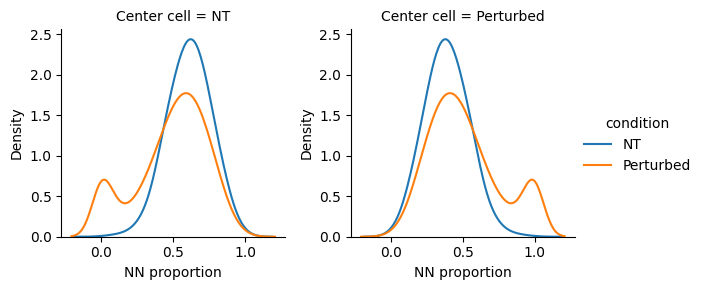

neighbor         NT  Perturbed
condition                     
NT         0.610466   0.389534
Perturbed  0.487340   0.512660
trace_similarity: 0.5615626856018627


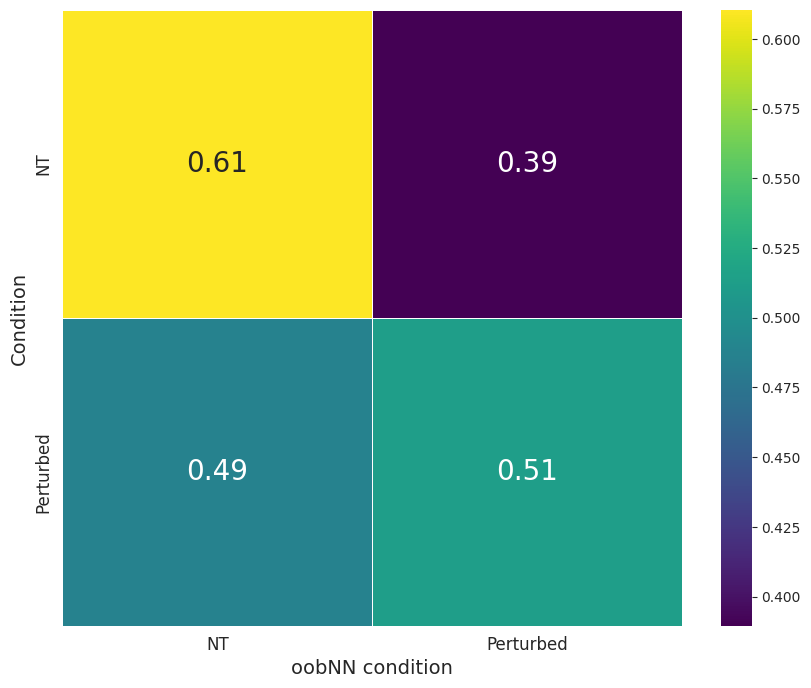

cellanova


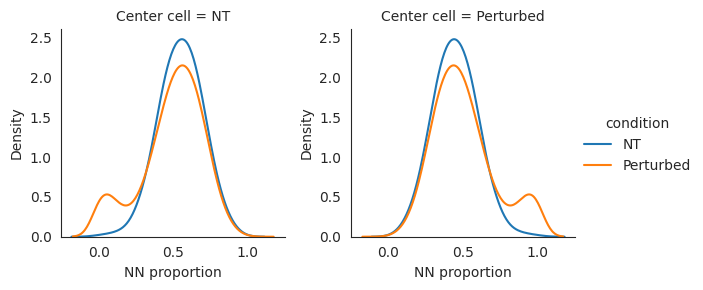

neighbor         NT  Perturbed
condition                     
NT         0.550653   0.449347
Perturbed  0.492851   0.507149
trace_similarity: 0.5289010467410572


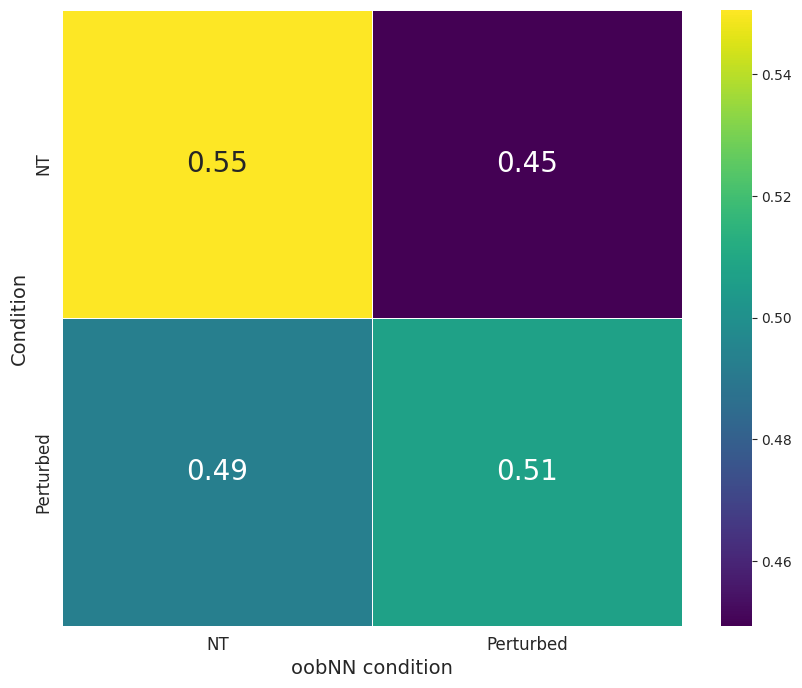

scDisInFact


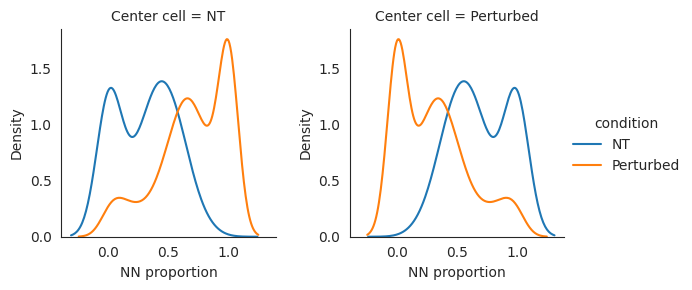

neighbor         NT  Perturbed
condition                     
NT         0.304155   0.695845
Perturbed  0.700388   0.299612
trace_similarity: 0.3018836717742097


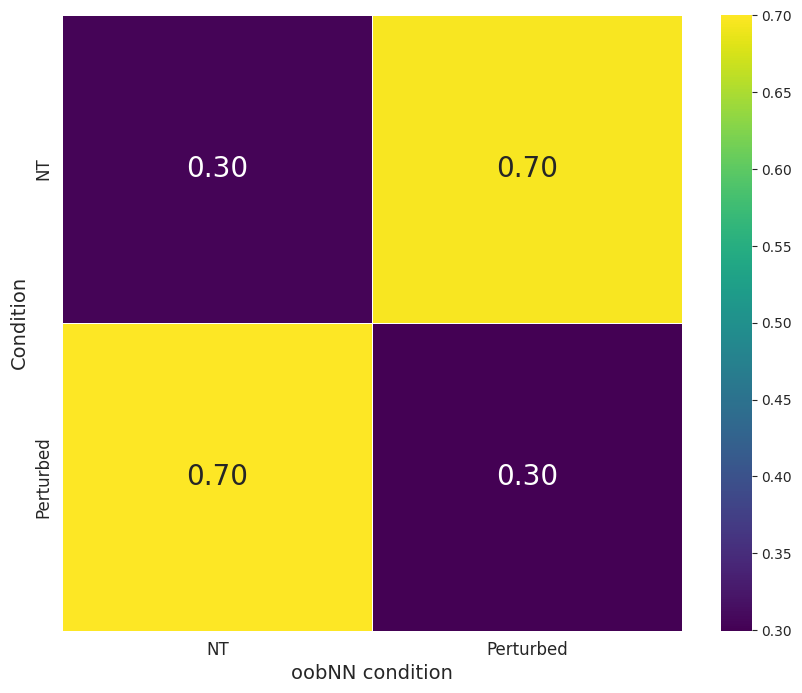

In [5]:
print("NDreamer")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/evaluate/ECCITE_perturbation_oobNN.csv")
plot_neighbor(df)

print("cellanova")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/benchmark/cellanova/ECCITE_oobNN.csv")
plot_neighbor(df)

print("scDisInFact")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/benchmark/scd/ECCITE_oobNN.csv")
plot_neighbor(df)

# ASD dataset

NDreamer


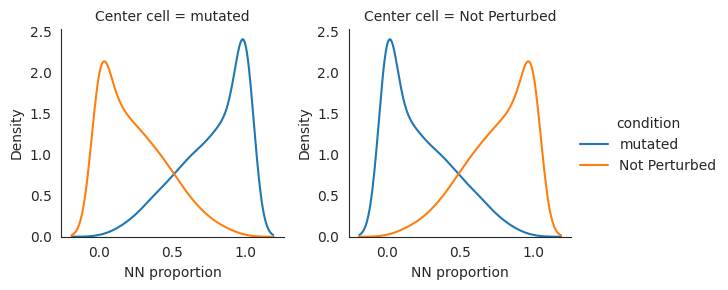

neighbor       Not Perturbed   mutated
condition                             
Not Perturbed       0.757681  0.242319
mutated             0.231521  0.768479
trace_similarity: 0.7630801351471774


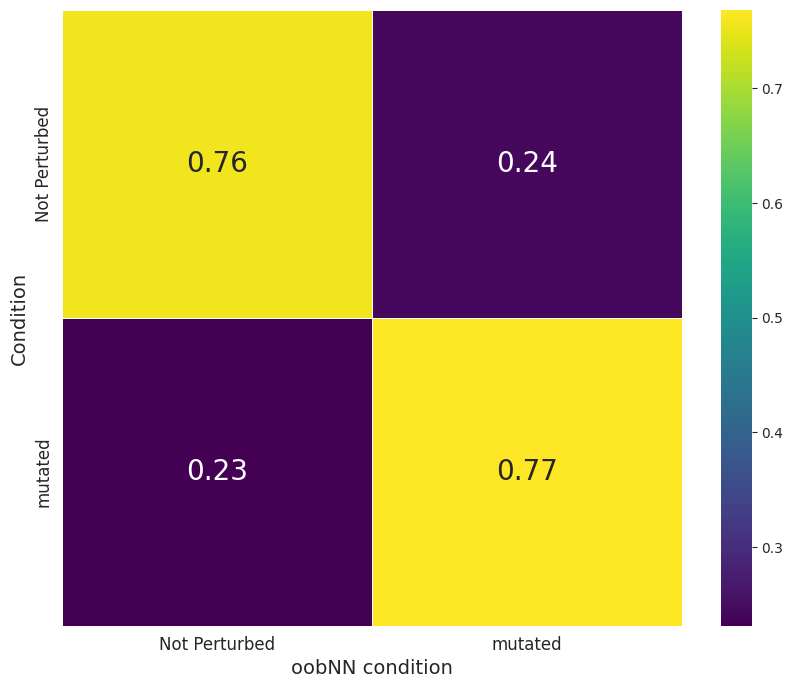

cellanova


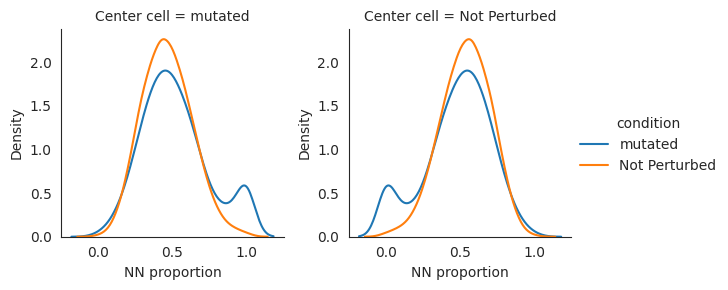

neighbor       Not Perturbed   mutated
condition                             
Not Perturbed       0.536879  0.463121
mutated             0.482050  0.517950
trace_similarity: 0.5274143836261791


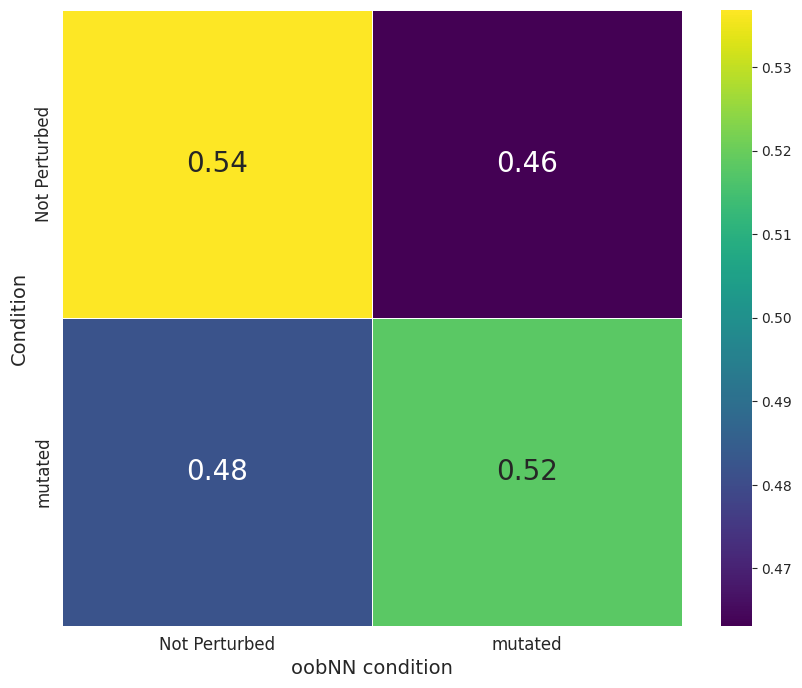

scDisInFact


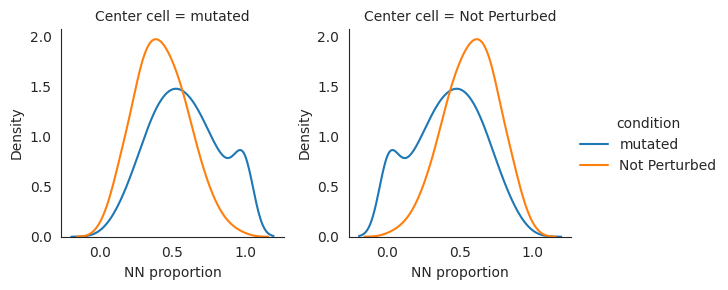

neighbor       Not Perturbed   mutated
condition                             
Not Perturbed       0.575671  0.424329
mutated             0.412158  0.587842
trace_similarity: 0.5817567354714984


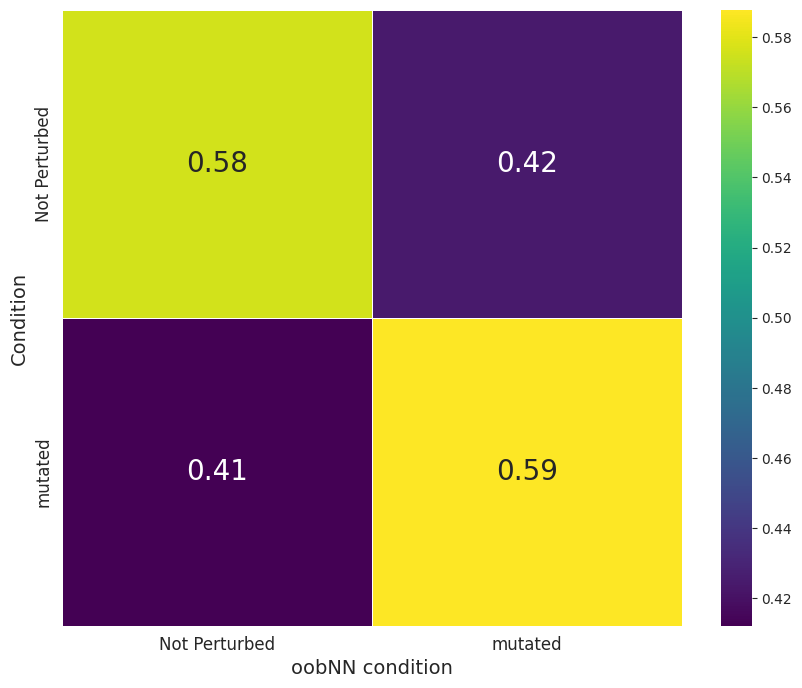

In [6]:
print("NDreamer")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/evaluate/ASD101_oobNN.csv")
plot_neighbor(df)

print("cellanova")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/benchmark/cellanova/ASD1_oobNN.csv")
plot_neighbor(df)

print("scDisInFact")
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/benchmark/scd/ASD1_oobNN.csv")
plot_neighbor(df)

# T1d dataset

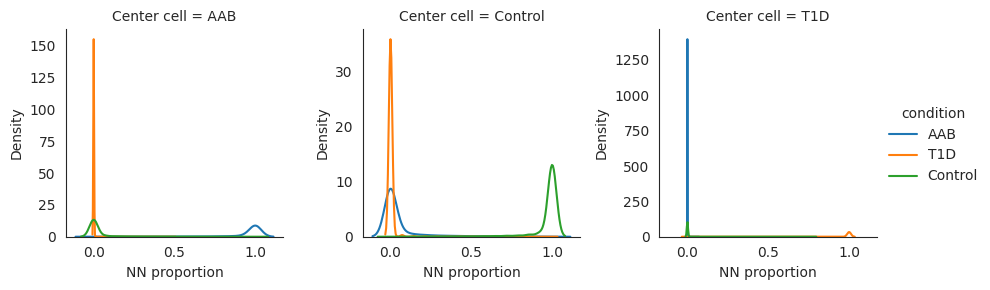

neighbor        AAB   Control       T1D
condition                              
AAB        0.952081  0.047905  0.000014
Control    0.028132  0.971213  0.000655
T1D        0.000364  0.004209  0.995427
trace_similarity: 0.9729070359068337


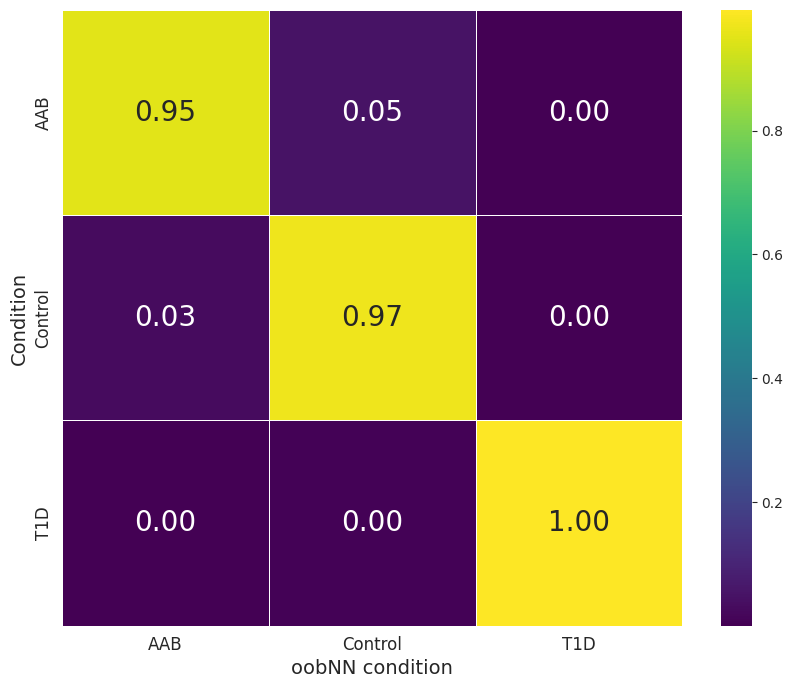

In [7]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/evaluate/t1d_oobNN.csv")
plot_neighbor(df)

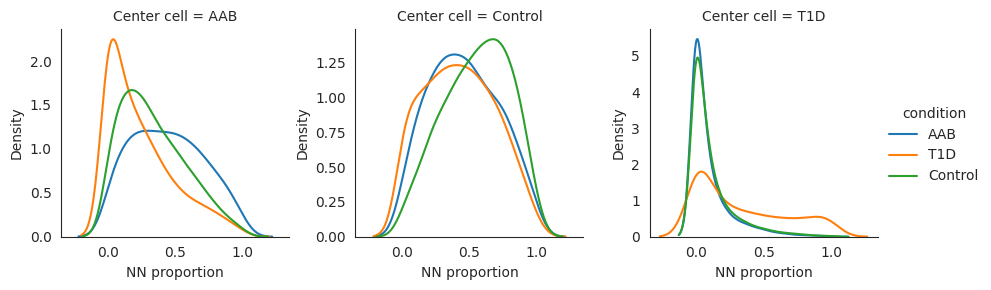

neighbor        AAB   Control       T1D
condition                              
AAB        0.443524  0.461984  0.094492
Control    0.338516  0.552509  0.108975
T1D        0.243367  0.425788  0.330845
trace_similarity: 0.4422927307425208


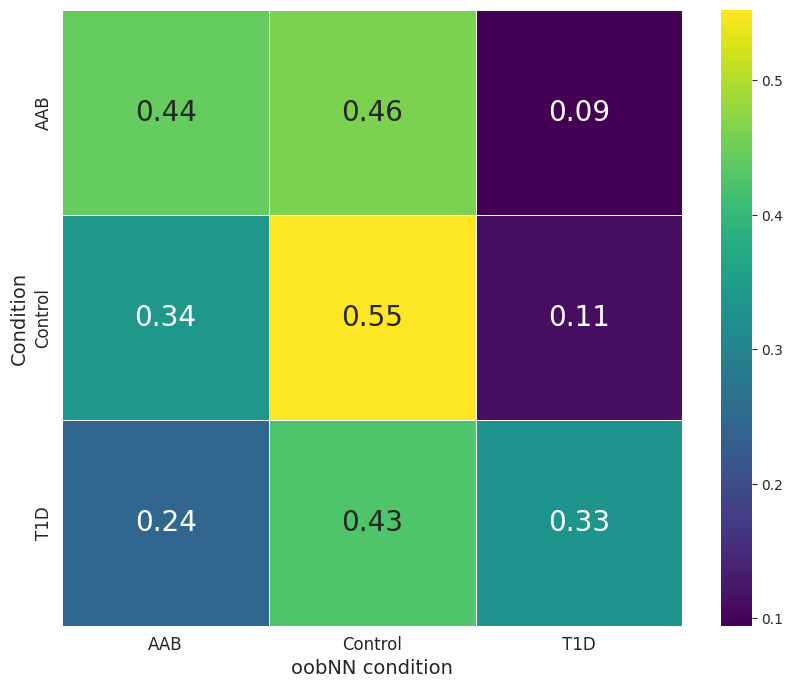

In [8]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/cellanova/t1d_oobNN.csv")
plot_neighbor(df)

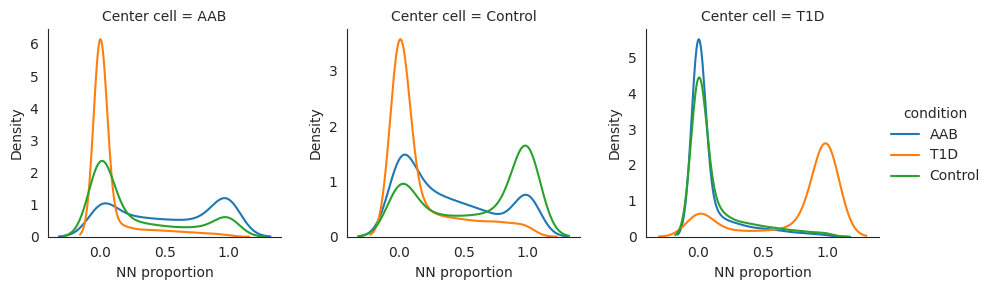

neighbor        AAB   Control       T1D
condition                              
AAB        0.517906  0.389673  0.092420
Control    0.275035  0.596278  0.128686
T1D        0.077637  0.163096  0.759267
trace_similarity: 0.6244838143854922


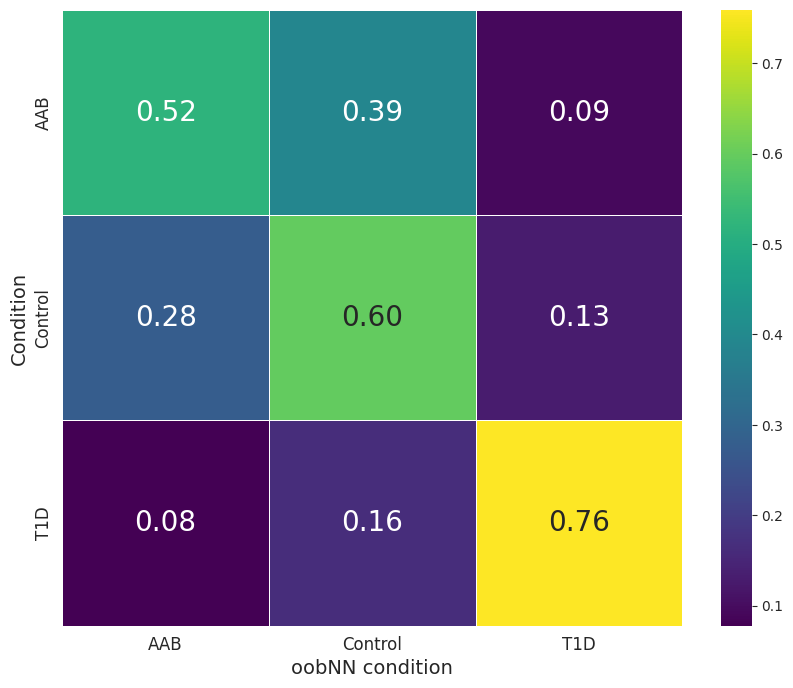

In [9]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/scd/t1d_oobNN.csv")
plot_neighbor(df)

# Kidney dataset

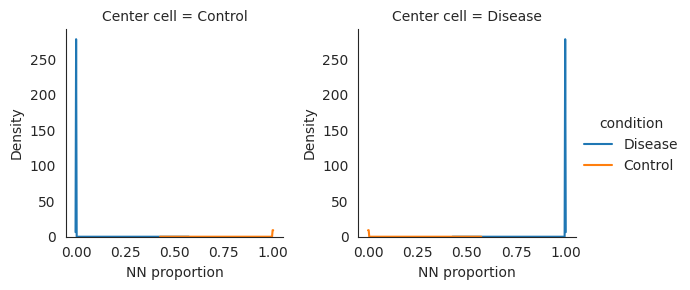

neighbor    Control   Disease
condition                    
Control    0.999976  0.000024
Disease    0.000056  0.999944
trace_similarity: 0.9999602163004115


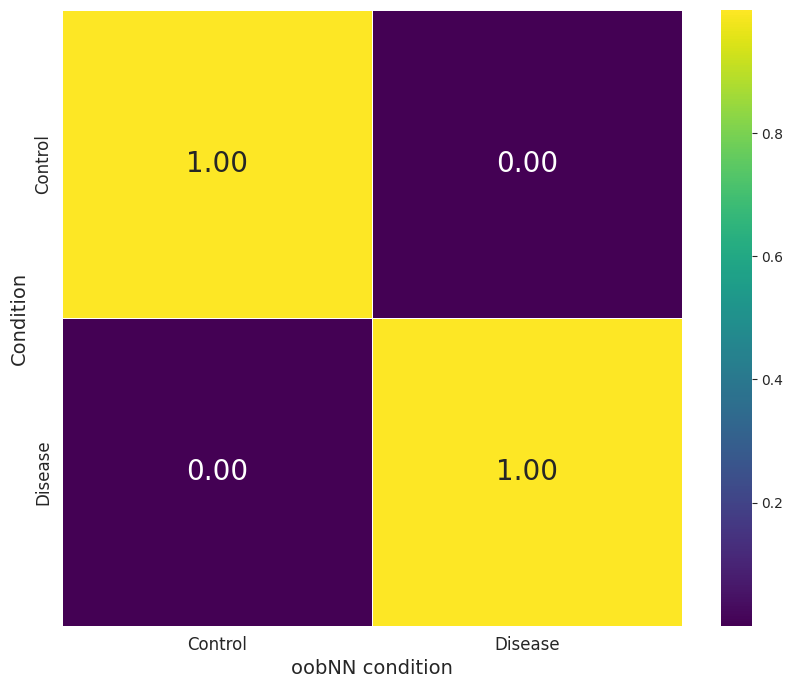

In [10]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/evaluate/kidney_oobNN.csv")
plot_neighbor(df)

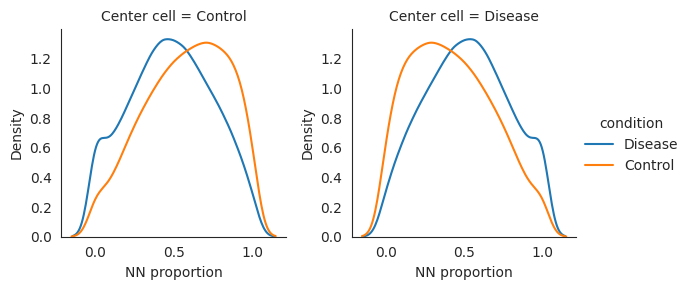

neighbor    Control   Disease
condition                    
Control    0.579030  0.420970
Disease    0.479549  0.520451
trace_similarity: 0.549740613351998


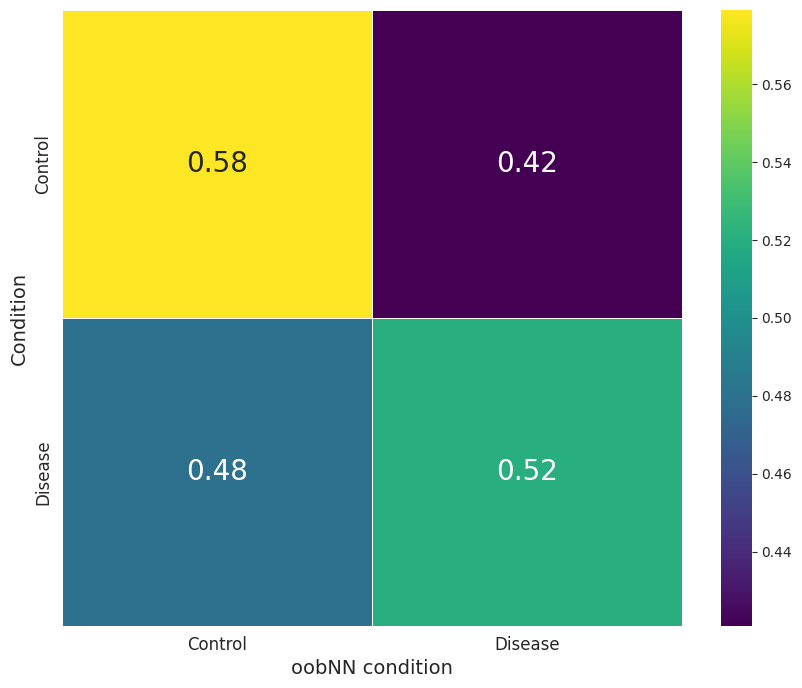

In [11]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/cellanova/kidney_oobNN.csv")
plot_neighbor(df)

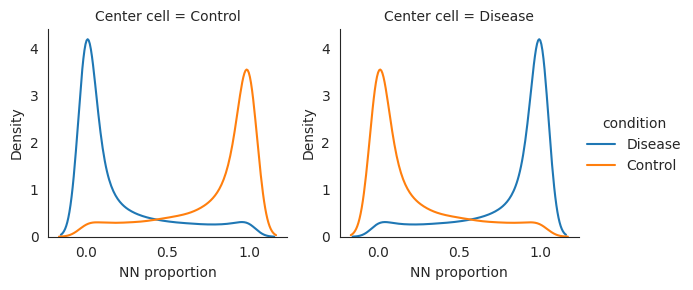

neighbor    Control   Disease
condition                    
Control    0.787291  0.212709
Disease    0.189732  0.810268
trace_similarity: 0.7987796389211306


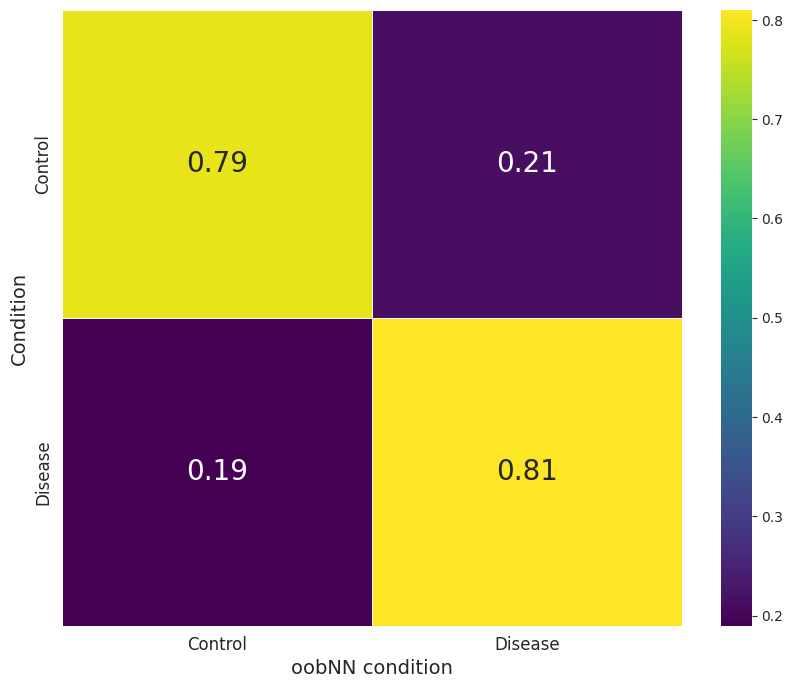

In [12]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/scd/kidney_oobNN.csv")
plot_neighbor(df)

# Mouse dataset

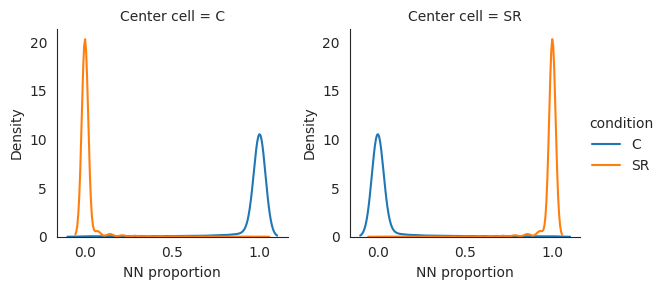

neighbor          C        SR
condition                    
C          0.961344  0.038656
SR         0.014805  0.985195
trace_similarity: 0.9732694747884005


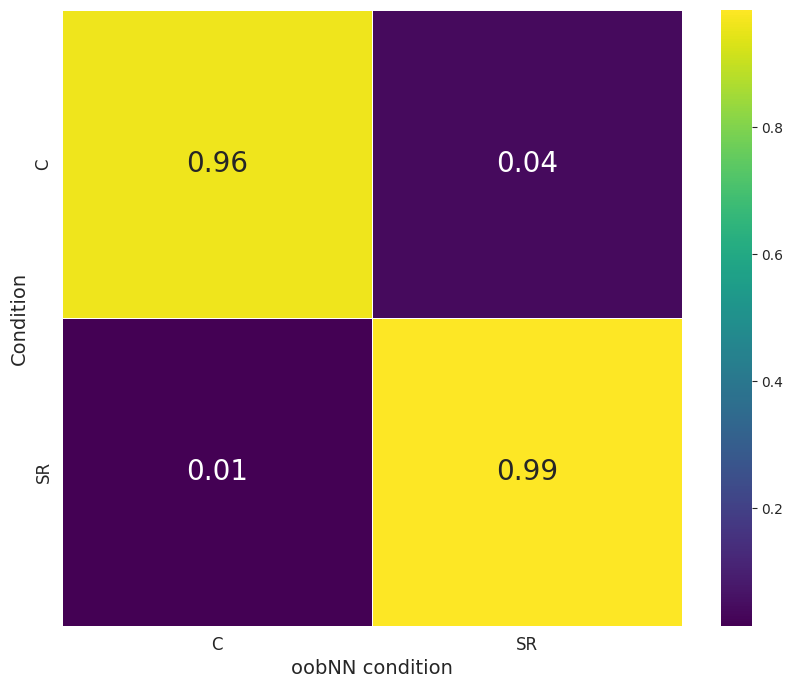

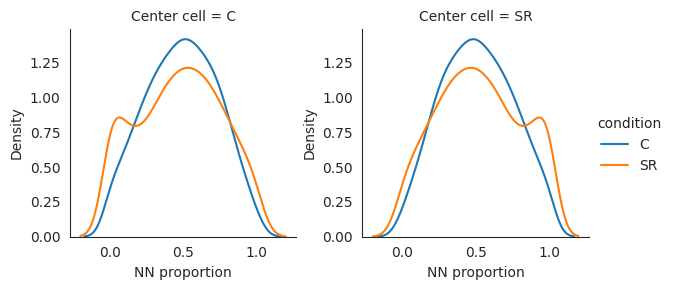

neighbor          C        SR
condition                    
C          0.489302  0.510698
SR         0.474340  0.525660
trace_similarity: 0.5074810827566676


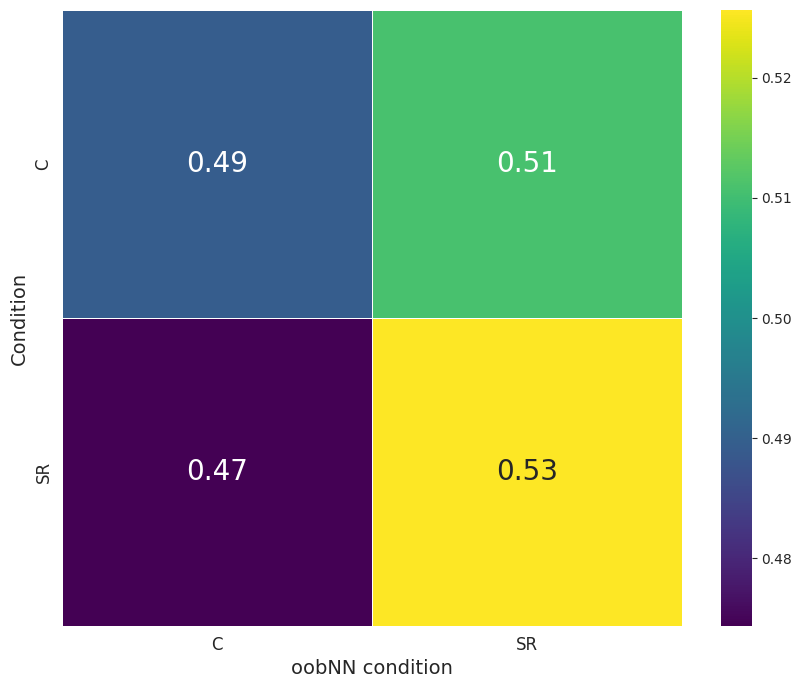

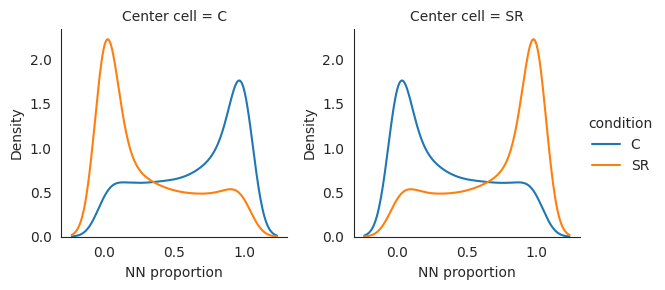

neighbor          C        SR
condition                    
C          0.641294  0.358706
SR         0.304554  0.695446
trace_similarity: 0.6683704028647544


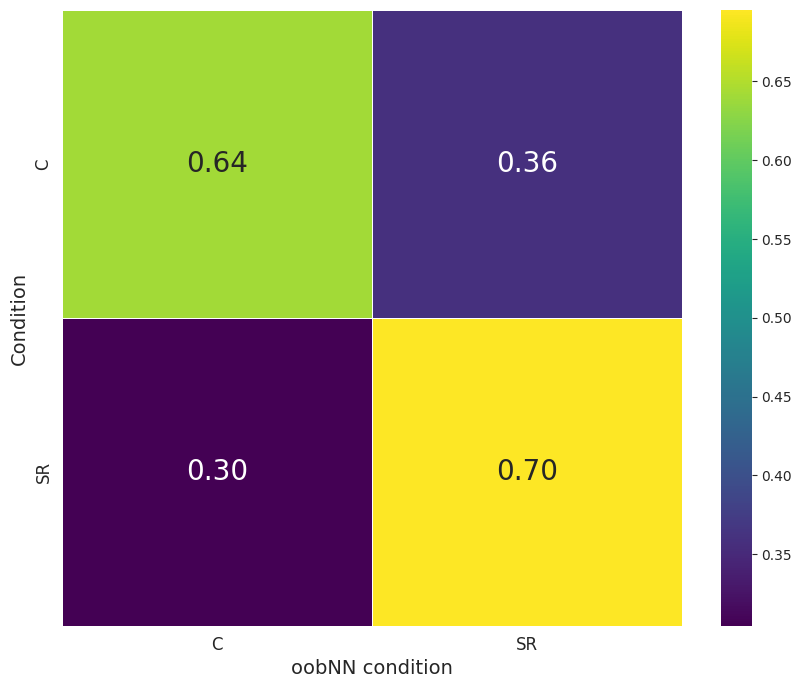

In [13]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/evaluate/mouse_oobNN.csv")
plot_neighbor(df)

df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/cellanova/mouse_oobNN.csv")
plot_neighbor(df)

df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/scd/mouse_oobNN.csv")
plot_neighbor(df)

# SEA-AD dataset

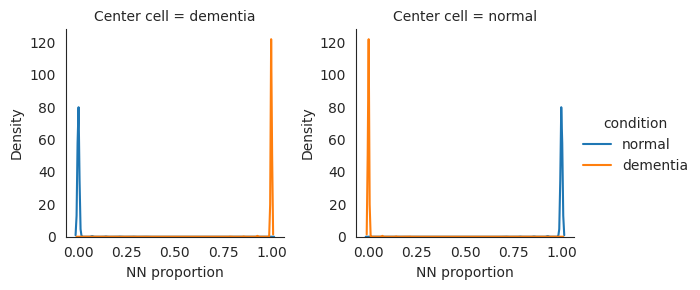

neighbor   dementia    normal
condition                    
dementia   0.998497  0.001503
normal     0.003245  0.996755
trace_similarity: 0.9976261829963036


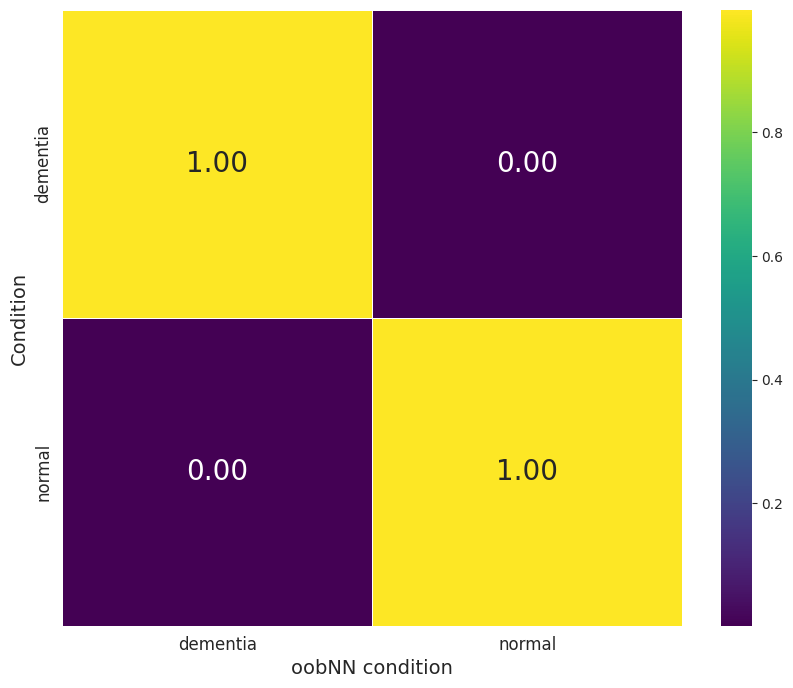

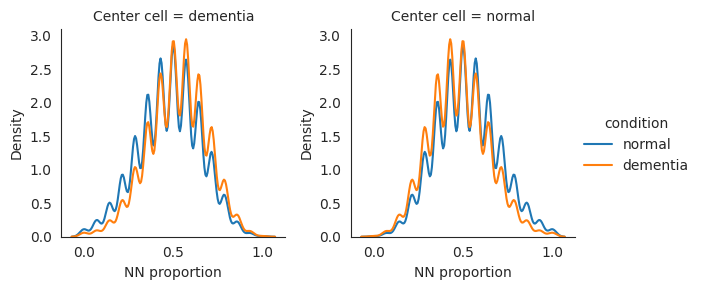

neighbor   dementia    normal
condition                    
dementia   0.520470  0.479530
normal     0.478189  0.521811
trace_similarity: 0.5211400688189651


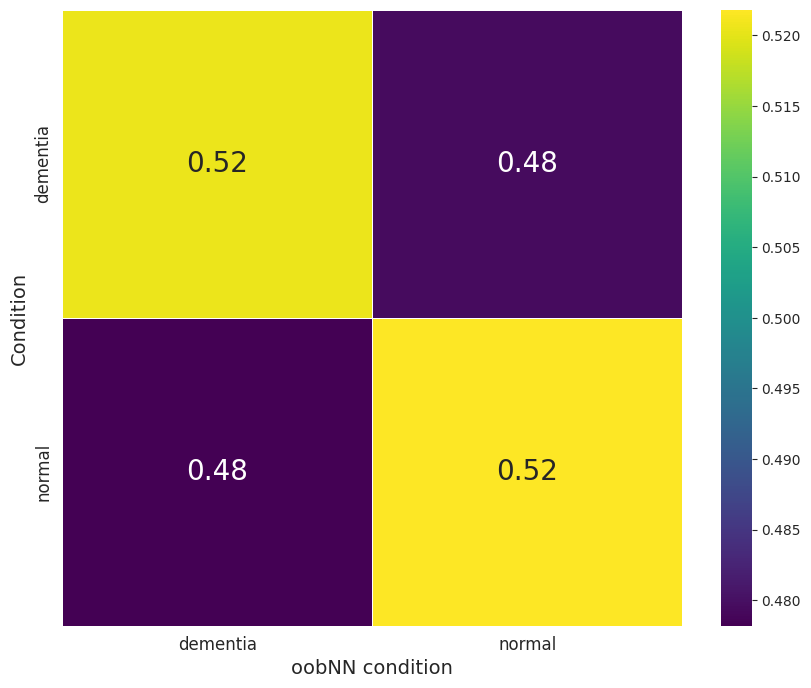

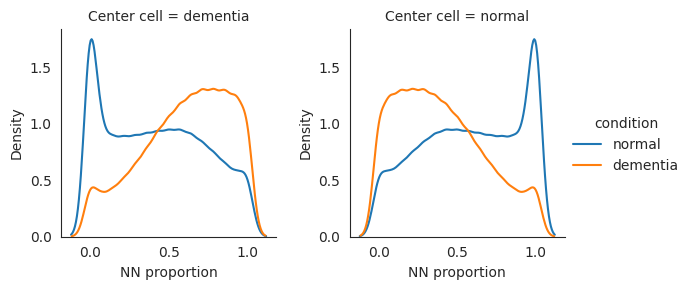

neighbor   dementia    normal
condition                    
dementia   0.604792  0.395208
normal     0.420223  0.579777
trace_similarity: 0.5922845127760163


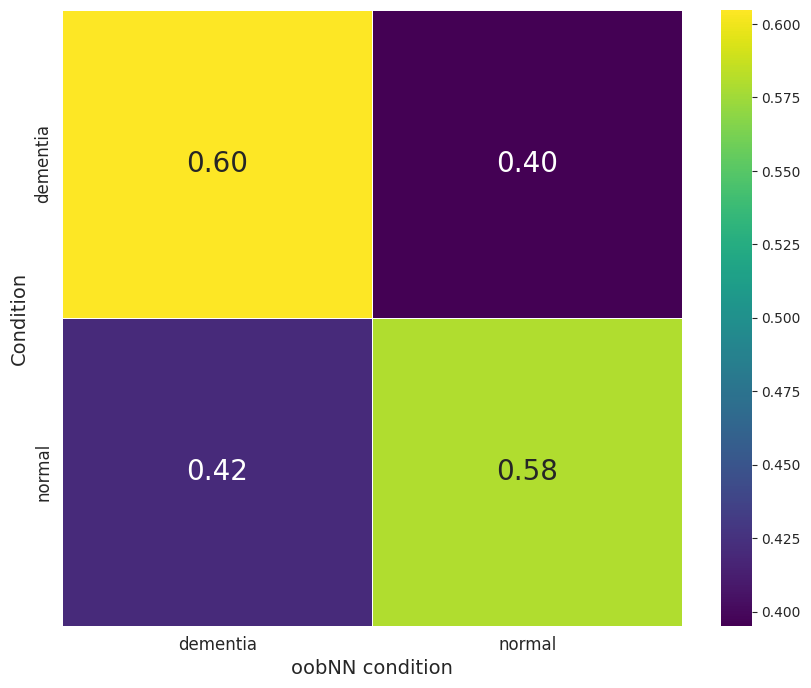

In [14]:
df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control/evaluate/AD_oobNN.csv")
plot_neighbor(df)

df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/cellanova/AD_oobNN.csv")
plot_neighbor(df)

df=pd.read_csv("/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/case_control_benchmark/scd/AD_oobNN.csv")
plot_neighbor(df)